<a href="https://colab.research.google.com/github/tjtmddnjswkd/capstone/blob/jc/p3_preprocessing_memo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 0.Data Load


In [1]:
import pandas as pd
import numpy as np
import os

try:
    gdrive_path = r'G:\내 드라이브\KB인턴관련'
except:
    gdrive_path = "/content/drive/MyDrive/KB인턴관련"

df_laws = pd.read_csv(os.path.join(
    gdrive_path, "export_crawl_1\\crawl_total.csv"), encoding='euc-kr')
df_expt = pd.read_csv(os.path.join(
    gdrive_path, "crawl_except.csv"), encoding='euc-kr')


In [2]:
df = pd.concat([df_laws, df_expt], axis=0).reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585976 entries, 0 to 585975
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  585976 non-null  object
 1   lawName   585976 non-null  object
 2   ENG       585976 non-null  object
 3   KOR       585946 non-null  object
dtypes: object(4)
memory usage: 17.9+ MB


# 1.Basic Preprocess


## 1.1.NaN Data


In [3]:
# 영어 NaN
df.loc[df.ENG.isna()]


,category,lawName,ENG,KOR


In [4]:
# 한글 NaN
df.loc[df.KOR.isna()]


,category,lawName,ENG,KOR
39667,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,Previous mandatory service period - the number...,NaN
39668,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,Previous mandatory service period - the number...,NaN
79104,통화ㆍ국채ㆍ금융,금융위원회의 설치 등에 관한 법률 시행령,Shares in expenses paid under Article 47 (1) o...,NaN
107052,상업ㆍ무역ㆍ공업,벤처기업육성에 관한 특별조치법 시행령,(Market price as at the date stock option is g...,NaN
112590,상업ㆍ무역ㆍ공업,할부거래에 관한 법률 시행령,Amount to be reserved = (The amount received i...,NaN
170002,환경,가습기살균제 피해구제를 위한 특별법,Contribution = 100 billion won ×｛(usage ratio ...,NaN
187029,환경,환경영향평가법 시행령,[Area prescribed in subparagraph 1 / Minimum a...,NaN
232679,국가공무원,공무원연금법 시행령,[36 - (Number of months during which a pension...,NaN
288588,경찰,의무경찰대 설치 및 운영에 관한 법률 시행령,(Average base monthly income of all public off...,NaN
288589,경찰,의무경찰대 설치 및 운영에 관한 법률 시행령,(Average base monthly income of all public off...,NaN


- `KOR`이 `NaN`인 경우는 영어에 쌍으로 수집되는 데이터가 누락된 경우이기에 삭제 처리 함


In [5]:
df = df.dropna(subset=["KOR"], axis=0).reset_index(drop=True)


## 1.2.어절을 통한 회귀로 무결성 검증 절차 생각해보기


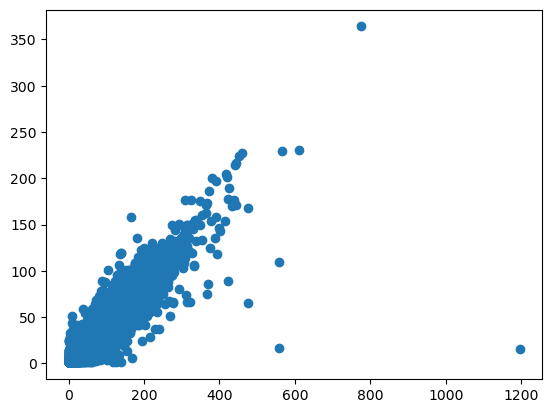

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df.ENG.apply(lambda x: len(x.split(" "))),
            df.KOR.apply(lambda x: len(x.split(" "))))

plt.show()


In [7]:
import statsmodels.api as sm

x = df.ENG.apply(lambda x: len(x.split(" ")))
y = df.KOR.apply(lambda x: len(x.split(" ")))
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    KOR   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 5.467e+06
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:27:49   Log-Likelihood:            -1.6263e+06
No. Observations:              585946   AIC:                         3.253e+06
Df Residuals:                  585944   BIC:                         3.253e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7042      0.008    213.025      0.000       1.689       1.720
ENG            0.4319      0.000   2338.138      0.000       0.432       0.432
==============================================================================
Omnibus:                   639769.795   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6409536486.102
Skew:                          -4.095   Prob(JB):                         0.00
Kurtosis:                     515.312   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
y_hat = x.ENG.apply(lambda x: 1.7042+0.4319*x)
y_hat


0         31.0734
1          9.4784
2         15.0931
3         17.6845
4         13.3655
           ...   
585941     9.0465
585942    49.6451
585943    13.3655
585944     8.1827
585945     2.5680
Name: ENG, Length: 585946, dtype: float64

In [9]:
res_square = (y_hat-y).apply(lambda x: x**2).sort_values(ascending=False)


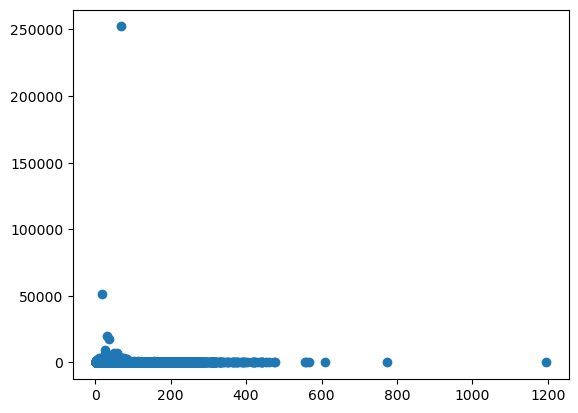

In [10]:
plt.scatter(x.ENG, res_square)
plt.show()


Q1: -0.020388698126347967	Q3: 1.0934800504185453


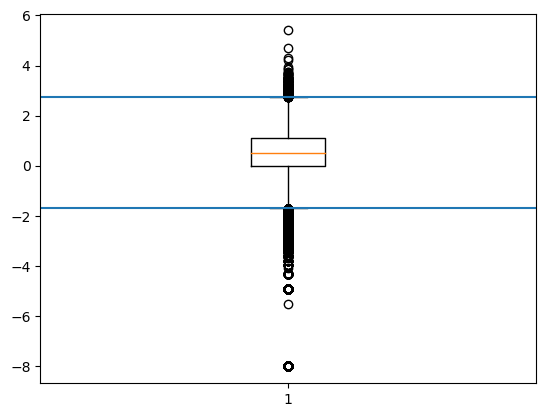

In [11]:
plt.boxplot(np.log10(res_square))
q1, q3 = np.quantile(np.log10(res_square), 0.25), np.quantile(
    np.log10(res_square), 0.75)
print(f"Q1: {q1}\tQ3: {q3}")
IQR = 1.5*(q3-q1)
plt.axhline(q1-IQR)
plt.axhline(q3+IQR)
plt.show()


In [12]:
df_up = df.loc[res_square > 50000]


In [13]:
df_down = df.loc[res_square.apply(lambda x: np.log10(x)) < q1-IQR]


- 띄어쓰기 단위로 완전히 동떨어진 문장들은 찾을 수 있음
- 그러나 이를 활용하여 <span style="color:cyan">**번역 쌍의 무결성**</span>을 검증할 수는 없음


## 1.3.`konlpy`를 통해 검증해 보기


In [14]:
from konlpy.tag import Okt, Kkma

okt = Okt()
kkma = Kkma()
text = "설치가 완료 되었습니까? 안된다면 다시 시도해 주세요."
print(okt.morphs(text))
print(okt.nouns(text))


['설치', '가', '완료', '되었습니까', '?', '안된다면', '다시', '시도', '해', '주세요', '.']
['설치', '완료', '다시', '시도']


In [15]:
if "num_of_noun_kor.csv" not in os.listdir(os.path.join(gdrive_path, 'etc_files')):
    num_of_noun_kor = df.KOR.apply(lambda x: len(okt.nouns(x)))
    num_of_noun_kor.to_csv(os.path.join(
        gdrive_path, "etc_files/num_of_noun_kor.csv"))
else:
    num_of_noun_kor = pd.read_csv(os.path.join(
        gdrive_path, "etc_files/num_of_noun_kor.csv"), index_col=0)
    num_of_noun_kor = pd.Series(
        data=num_of_noun_kor.KOR, index=num_of_noun_kor.index)
num_of_noun_kor


0         39
1          7
2         18
3         24
4         19
          ..
585941     8
585942    59
585943    14
585944     5
585945     1
Name: KOR, Length: 585946, dtype: int64

In [16]:
# 명사 1개 전부 삭제
one_noun_index = (num_of_noun_kor == 1)
df.loc[one_noun_index].sort_values(
    by="KOR", key=lambda col: col.apply(len), ascending=False).head()


,category,lawName,ENG,KOR
354157,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"2. For the period from June 1, 2005 to June 21...",2. 2005년 6월 1일부터 2012년 6월 21일까지 기간분: 1일 10만분의 29
354156,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"1. For the period from April 1, 1999 to May 31...",1. 1999년 4월 1일부터 2005년 5월 31일까지 기간분: 1일 1만분의 4
265763,형사법,형사소송법,"[92 Hun-Ga 8, Dec. 24, 1992 (Act No. 5054, Dec...",[92헌가8 1992. 12. 24.(1995. 12. 29. 法5054)]
264744,형사법,형사소송법,"[93 Hun-Ga2, Dec. 23, 1993 (Act No. 2450, Jan....",[93헌가2 1993. 12. 23.(1973. 1. 25. 法2450)]
536032,환경,물환경보전법 시행령,10. Polychlorinated biphenyl;,10. 폴리염화비페닐[polychlorinated biphenyl]


In [17]:
# 명사 2개 전부 삭제
noun_index = (num_of_noun_kor == 2)
df.loc[noun_index].sort_values(
    by="KOR", key=lambda col: col.apply(len), ascending=False).head()


,category,lawName,ENG,KOR
44824,교육ㆍ학술,교육공무원법,2. For a person whose date of birth arrives be...,2. 1934년 3월 1일부터 1937년 8월 31일까지의 기간중에 있는 자: 19...
280176,지방제도,지방세특례제한법,2. Acquisition tax shall be reduced by 50/100 ...,2. 2021년 1월 1일부터 2021년 12월 31일까지는 취득세의 100분의 5...
555218,노동,산업안전보건법 시행령,7. Yellow phosphorus [12185-10-3] match;,7. 황린(黃燐)[12185-10-3] 성냥(Yellow phosphorus match)
232066,국가공무원,공무원수당 등에 관한 규정,"[Title Amended on Dec. 11, 2013; Dec. 16, 2013...","[제목개정 2013. 12. 11., 2013. 12. 16., 2020. 6. 23.]"
499524,수자원·토지·건설,건설기술 진흥법,"[Title Amended on Dec. 31, 2018; Apr. 30, 2019...","[제목개정 2018. 12. 31., 2019. 4. 30., 2021. 3. 16.]"


In [18]:
# 명사 4개 전부 삭제
import re

less_noun_index = (num_of_noun_kor < 2)
df_temp = df.loc[less_noun_index].sort_values(by="KOR", key=lambda col: col.apply(
    lambda x: len(re.sub("[^ㄱ-ㅎ|가-힣]", "", x))), ascending=False)
df_temp.head()


,category,lawName,ENG,KOR
354156,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"1. For the period from April 1, 1999 to May 31...",1. 1999년 4월 1일부터 2005년 5월 31일까지 기간분: 1일 1만분의 4
354157,재정ㆍ경제일반,독점규제 및 공정거래에 관한 법률 시행령,"2. For the period from June 1, 2005 to June 21...",2. 2005년 6월 1일부터 2012년 6월 21일까지 기간분: 1일 10만분의 29
261131,형사법,소년법,(1) The trial shall be conducted in a spirit o...,① 심리는 친절하고 온화하게 하여야 한다.
299181,군사,군사법원법,"(4) To make an oath, one shall rise to his/her...",④ 선서는 일어서서 엄숙하게 하여야 한다.
264912,형사법,형사소송법,(4) The oath shall be taken solemnly in the st...,④ 선서는 일어서서 엄숙하게 하여야 한다.


In [19]:
re.sub("[^ㄱ-ㅎ|가-힣]", "", "② 보육은 영유아가 안전하고 쾌적한 환경에서 건강하게 성장할 수 있도록 하여야 한다.")


'보육은영유아가안전하고쾌적한환경에서건강하게성장할수있도록하여야한다'

In [20]:
import string

if "okt_pos_srs.csv" not in os.listdir(os.path.join(gdrive_path, 'etc_files')):
    okt_pos_srs = df.KOR.apply(lambda x: okt.pos(
        x.translate(str.maketrans("", "", string.punctuation))))
    okt_pos_srs.to_csv(os.path.join(
        gdrive_path, "etc_files/okt_pos_srs.csv"), encoding='euc-kr')
else:
    okt_pos_srs = pd.read_csv(os.path.join(
        gdrive_path, "etc_files/okt_pos_srs.csv"), encoding='euc-kr').KOR
okt_pos_srs


0         [('이', 'Noun'), ('법', 'Noun'), ('은', 'Josa'), ...
1         [('이', 'Noun'), ('법', 'Noun'), ('에서', 'Josa'),...
2         [('1', 'Number'), ('“', 'Foreign'), ('개성', 'No...
3         [('2', 'Number'), ('“', 'Foreign'), ('개성', 'No...
4         [('3', 'Number'), ('“', 'Foreign'), ('개성', 'No...
                                ...                        
585941    [('①', 'Foreign'), ('시행일', 'Noun'), ('이', 'Nou...
585942    [('②', 'Foreign'), ('해외', 'Noun'), ('이', 'Dete...
585943    [('③', 'Foreign'), ('벌칙', 'Noun'), ('에', 'Josa...
585944    [('①', 'Foreign'), ('이', 'Noun'), ('법', 'Noun'...
585945                   [('②', 'Foreign'), ('생략', 'Noun')]
Name: KOR, Length: 585946, dtype: object

In [27]:
def change_str_to_numpy(temp):
    # temp = okt_pos_srs[0]
    pattern = r'\[|\]|\(|\'|\)'
    temp_arr = np.array(re.sub(pattern, "", temp).split(", "))
    return temp_arr.reshape(-1, 2)


In [29]:
okt_pos_srs = okt_pos_srs.apply(change_str_to_numpy)


In [35]:
from collections import Counter
verb_srs = okt_pos_srs.apply(lambda x: Counter(x[:, 1])["Verb"])


,category,lawName,ENG,KOR
21,헌법,개성공업지구 지원에 관한 법률,"[Title Amended on Jan. 21, 2014; Dec. 31, 2018]","[제목개정 2014. 1. 21., 2018. 12. 31.]"
31,헌법,개성공업지구 지원에 관한 법률,"[This Article Newly Inserted on Jan. 21, 2014]",[본조신설 2014. 1. 21.]
38,헌법,개성공업지구 지원에 관한 법률,"[This Article Newly Inserted on Mar. 26, 2010]",[본조신설 2010. 3. 26.]
42,헌법,개성공업지구 지원에 관한 법률,"[This Article Newly Inserted on Mar. 26, 2010]",[본조신설 2010. 3. 26.]
44,헌법,개성공업지구 지원에 관한 법률,"[This Article Wholly Amended on Jan. 21, 2014]",[전문개정 2014. 1. 21.]
...,...,...,...,...
585927,외무,해외이주법,"[This Article Wholly Amended by Act No. 9286, ...",[전문개정 2008.12.31.]
585928,외무,해외이주법,"[This Article Wholly Amended by Act No. 9286, ...",[전문개정 2008.12.31.]
585934,외무,해외이주법,"[This Article Wholly Amended by Act No. 9286, ...",[전문개정 2008.12.31.]
585943,외무,해외이주법,(3) (Transitional Measures on Penalty Provisio...,③ (벌칙에 관한 경과조치) 이 법 시행전의 행위에 대한 벌칙의 적용에 있어서는 종...


In [54]:
df_not_verb = df[verb_srs == 0].sort_values(
    by="KOR", ascending=False, key=lambda col: col.apply(len))
df_not_verb.head(10)


,category,lawName,ENG,KOR
95250,축산,축산물 위생관리법,1. Where he or she violates Articles 4 (6) and...,"1. 제4조제6항ㆍ제7항, 제5조제2항, 제8조제2항, 제9조제2항ㆍ제3항, 제9조..."
250368,민사법,상법,"(2) The provisions of Articles 209, 210, 366 (...","② 제209조, 제210조, 제366조제2항ㆍ제3항, 제367조, 제373조제2항,..."
287049,경찰,도로교통법,"2. Articles 34-3, 44, 47, 48, 50 (1), (2), (4)...","2. 제34조의3, 제44조, 제47조, 제48조, 제50조제1항ㆍ제2항ㆍ제4항ㆍ제..."
338353,과학ㆍ기술,국가초고성능컴퓨터 활용 및 육성에 관한 법률,3. The Minister of Science and ICT: Policies t...,"3. 과학기술정보통신부장관: 국가초고성능컴퓨팅 응용 분야 연구개발 지원, 기본계획과..."
78901,통화ㆍ국채ㆍ금융,금융소비자 보호에 관한 법률,"1. Article 10, Article 11, Article 12 (1), (2)...","1. 제10조, 제11조, 제12조제1항ㆍ제2항ㆍ제4항부터 제6항까지, 제13조부터..."
378403,내국세,소득세법 시행령,"2. The amended provisions of Articles 3-2, 180...","2. 제3조의2, 제180조의2제2항, 제207조의2제1항ㆍ제8항, 제207조의8제..."
371667,내국세,부가가치세법 시행령,"1. The amended provisions of Articles 70 (3), ...","1. 제70조제3항, 제71조제2항, 제71조의2제1항, 제73조제1항(제13호는 ..."
192157,노동,근로기준법,"1. A person who violates Articles 10, 22 (1), ...","1. 제10조, 제22조제1항, 제26조, 제50조, 제51조의2제2항, 제52조제..."
286962,경찰,도로교통법,2. Administrative fines provided for in Articl...,"2. 제160조제1항(제52조제1항ㆍ제3항을 위반한 경우만 해당한다), 제2항(제4..."
250105,민사법,상법,"(2) The provisions of Articles 362, 363-2, 366...","② 제362조, 제363조의2, 제366조, 제367조, 제373조, 제376조, ..."


In [75]:
not_verb_index = df_not_verb.index
df.drop(index=not_verb_index)


,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
1,헌법,개성공업지구 지원에 관한 법률,The terms used in this Act are defined as foll...,"이 법에서 사용하는 용어의 정의는 다음과 같다. <개정 2009. 1. 30., 2..."
2,헌법,개성공업지구 지원에 관한 법률,1. The term “Gaeseong Industrial Complex” or “...,1. “개성공업지구”란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 ...
3,헌법,개성공업지구 지원에 관한 법률,2. The term “GIC developer” means a South Kore...,2. “개성공업지구 개발업자”란 「남북교류협력에 관한 법률」에 따른 협력사업의 승인...
4,헌법,개성공업지구 지원에 관한 법률,3. The term “GIC management organ” means a cor...,3. “개성공업지구 관리기관”이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 「개성공...
...,...,...,...,...
585939,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포한 날부터 시행한다.
585940,외무,해외이주법,(2) (Transitional Measures on Persons who have...,② (해외이주적격결정을 받은 자에 관한 경과조치) 이 법 시행전에 종전의 규정에 의...
585941,외무,해외이주법,(1) (Enforcement Date) This Act shall enter in...,① (시행일) 이 법은 공포후 3월이 경과한 날부터 시행한다.
585942,외무,해외이주법,(2) (Transitional Measures on Emigration Agent...,② (해외이주알선업자에 관한 경과조치) 이 법 시행당시 종전의 규정에 의하여 해외이...


In [83]:
okt.pos("밥을 먹는 사람이 있다")


[('밥', 'Noun'),
 ('을', 'Josa'),
 ('먹는', 'Verb'),
 ('사람', 'Noun'),
 ('이', 'Josa'),
 ('있다', 'Adjective')]

# 2.특수기호


## 2.1.`[ ]` 대괄호


In [40]:
# 영어 대괄호 -- [으로 시작하고 ]으로 끝나는 문장
df.loc[df.ENG.str.contains('^\[[^\]]+\]')]


,index,category,lawName,ENG,KOR
21,21,헌법,개성공업지구 지원에 관한 법률,"[Title Amended on Jan. 21, 2014; Dec. 31, 2018]","[제목개정 2014. 1. 21., 2018. 12. 31.]"
31,31,헌법,개성공업지구 지원에 관한 법률,"[This Article Newly Inserted on Jan. 21, 2014]",[본조신설 2014. 1. 21.]
38,38,헌법,개성공업지구 지원에 관한 법률,"[This Article Newly Inserted on Mar. 26, 2010]",[본조신설 2010. 3. 26.]
42,42,헌법,개성공업지구 지원에 관한 법률,"[This Article Newly Inserted on Mar. 26, 2010]",[본조신설 2010. 3. 26.]
44,44,헌법,개성공업지구 지원에 관한 법률,"[This Article Wholly Amended on Jan. 21, 2014]",[전문개정 2014. 1. 21.]
...,...,...,...,...,...
585923,585953,외무,해외이주법,"[This Article Wholly Amended by Act No. 9286, ...",[전문개정 2008.12.31.]
585925,585955,외무,해외이주법,"[This Article Wholly Amended by Act No. 9286, ...",[전문개정 2008.12.31.]
585927,585957,외무,해외이주법,"[This Article Wholly Amended by Act No. 9286, ...",[전문개정 2008.12.31.]
585928,585958,외무,해외이주법,"[This Article Wholly Amended by Act No. 9286, ...",[전문개정 2008.12.31.]


In [42]:
# 한글 대괄호 -- [으로 시작하고 ]으로 끝나는 문장
df_temp = df.loc[df.KOR.str.contains('^\[[^\]]+\]')]


In [61]:
temp = df_temp.KOR.apply(lambda x: x.strip("[]").split(" ")[0]).value_counts()
temp[temp > 20]


전문개정         29139
본조신설         17012
제목개정          4233
종전             946
시행일:           240
시행일            183
법률             152
대통령령            48
시행일:2021.       37
시행일]            24
헌법불합치,          23
제15조에서          22
Name: KOR, dtype: int64